In [28]:
import pandas as pd
import os
import json


In [29]:
business_json_path = 'business.json'
business = pd.read_json(business_json_path, lines=True)
business.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [30]:
filtered_business = business[business['categories'].str.contains('Breakfast & Brunch', na=False) &
                             business['categories'].str.contains('Restaurants', na=False) &
                             (business['city'] == 'Indianapolis')& 
                             (business['state'] == 'IN')]





In [31]:
filtered_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
636,HCbJPXWXvwN-C7XfmVy3gA,Granite City Food & Brewery,"49 W Maryland St, Ste B03A",Indianapolis,IN,46204,39.766420,-86.159245,3.5,258,0,"{'RestaurantsGoodForGroups': 'True', 'Ambience...","Desserts, Breweries, Breakfast & Brunch, Resta...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-0:0',..."
770,2DsplH_vy4GCcEnVpn0AbA,Cafe Olivia,222 E Market St,Indianapolis,IN,46204,39.768973,-86.153309,4.5,34,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Sandwiches, Breakfast & Brunch, Food Stands, I...","{'Monday': '10:45-14:0', 'Tuesday': '10:45-14:..."
909,Iuir7lUtx-LMhYtStwyf3Q,Another Broken Egg Cafe,"5025 E 82nd St, Ste 2500",Indianapolis,IN,46250,39.904151,-86.083809,4.0,26,1,"{'WheelchairAccessible': 'True', 'RestaurantsG...","American (Traditional), Restaurants, Breakfast...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
1838,zwfN21b6gN2XGjNG6MYNzQ,Wolfgang Puck Express,2500 S High School Rd,Indianapolis,IN,46241,39.716693,-86.297826,2.0,70,0,"{'RestaurantsAttire': 'u'casual'', 'NoiseLevel...","Breakfast & Brunch, American (New), Salad, Res...",None


In [32]:
len(filtered_business)

337

In [33]:
business_ids = set(filtered_business['business_id'])


filtered_reviews = []


review_json_path = 'review.json'
chunk_size = 100000  
for chunk in pd.read_json(review_json_path, lines=True, chunksize=chunk_size):
    
    filtered_chunk = chunk[chunk['business_id'].isin(business_ids)]
    filtered_reviews.append(filtered_chunk)


all_filtered_reviews = pd.concat(filtered_reviews, ignore_index=True)


merged_data = pd.merge(filtered_business, all_filtered_reviews, on='business_id')



In [34]:
merged_data.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,"American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",YByDh56Hl11HoYdBm-uArA,9hhRs_n85m-jsKOXp3jt7Q,1,0,0,0,Went there at 4am and there was only one waitr...,2016-05-08 08:49:25


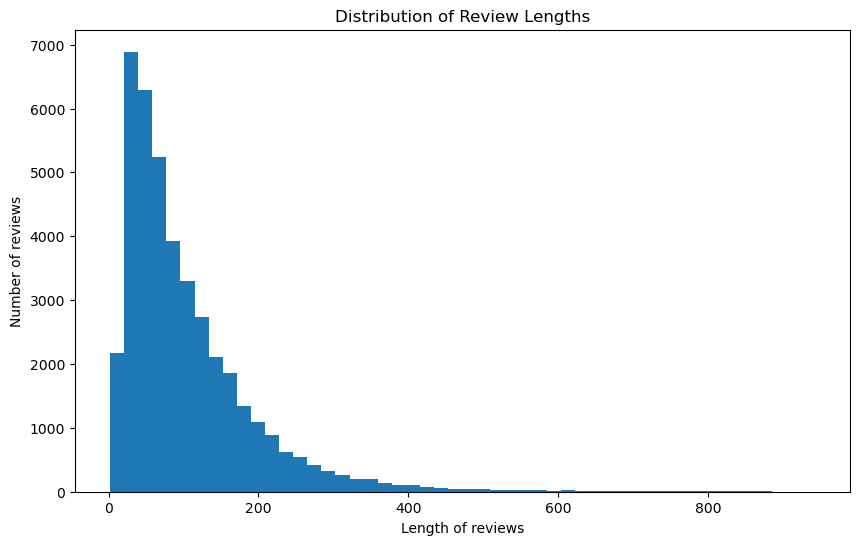

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = merged_data

# Calculate the length of reviews
df['review_len'] = df['text'].apply(lambda x: len(x.split()))

# Plot a histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(df['review_len'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of reviews')
plt.ylabel('Number of reviews')
plt.show()


In [21]:
# Calculate various statistics of review length
average_length = df['review_len'].mean()
median_length = df['review_len'].median()
percentile_90 = df['review_len'].quantile(0.90)
percentile_95 = df['review_len'].quantile(0.95)
percentile_99 = df['review_len'].quantile(0.99)

# Print out the statistics
print(f"Average Review Length: {average_length}")
print(f"Median Review Length: {median_length}")
print(f"90th Percentile Review Length: {percentile_90}")
print(f"95th Percentile Review Length: {percentile_95}")
print(f"99th Percentile Review Length: {percentile_99}")


Average Review Length: 104.66833720705016
Median Review Length: 78.0
90th Percentile Review Length: 213.0
95th Percentile Review Length: 274.0
99th Percentile Review Length: 450.0


In [41]:
def extract_attribute_keys(row):
    keys = set()
    if pd.notna(row):
        for key, value in row.items():
            keys.add(key)
          
            if isinstance(value, dict):
                keys.update(value.keys())
    return keys


all_keys = set()
merged_data['attributes'].apply(lambda x: all_keys.update(extract_attribute_keys(x)))

all_keys

{'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi'}

In [10]:
len(filtered_business)

337

In [42]:
def flatten_attributes(row):
    flattened = {}
    if pd.notna(row):
        for key, value in row.items():
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    flattened[sub_key] = 1 if sub_value else 0
            else:
                flattened[key] = 1 if value else 0
    return pd.Series(flattened)


attributes_df = merged_data['attributes'].apply(flatten_attributes)


attributes_df.fillna(0, inplace=True)


attributes_df = attributes_df.astype(int)


merged_data = merged_data.join(attributes_df)




In [43]:
(filtered_business.head())


,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,DriveThru,CoatCheck,Music,BestNights,GoodForDancing,BYOB,Corkage,AgesAllowed,BYOBCorkage,Smoking
0,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,0,0,0,0,0,0,0,0
1,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,0,0,0,0,0,0,0,0
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,0,0,0,0,0,0,0,0
3,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,0,0,0,0,0,0,0,0
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,0,0,0,0,0,0,0,0


In [44]:
merged_data=filtered_business

In [45]:
merged_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful', 'funny', 'cool', 'text', 'date', 'RestaurantsReservations',
       'RestaurantsTakeOut', 'RestaurantsAttire', 'GoodForKids', 'BikeParking',
       'RestaurantsPriceRange2', 'BusinessAcceptsCreditCards', 'GoodForMeal',
       'RestaurantsGoodForGroups', 'OutdoorSeating', 'WiFi', 'Alcohol',
       'RestaurantsDelivery', 'BusinessParking', 'HasTV', 'Ambience', 'Caters',
       'NoiseLevel', 'HappyHour', 'WheelchairAccessible', 'ByAppointmentOnly',
       'DogsAllowed', 'BusinessAcceptsBitcoin', 'RestaurantsTableService',
       'DriveThru', 'CoatCheck', 'Music', 'BestNights', 'GoodForDancing',
       'BYOB', 'Corkage', 'AgesAllowed', 'BYOBCorkage', 'Smoking'],
      dtype='object')

In [46]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
df=merged_data
# Assuming you have NLTK stopwords downloaded
nltk.download('stopwords')

# Load the NLTK stopwords
stop_words = set(stopwords.words('english'))

# Tokenize the text and count word frequencies
def tokenize_and_count(text):
    words = nltk.word_tokenize(text.lower())
    # Remove stopwords and non-alphanumeric words
    words = [word for word in words if word.isalnum() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts

# Apply the tokenization and counting function to each review
df['word_counts'] = df['text'].apply(tokenize_and_count)

# Calculate the total number of words in each review
df['total_words'] = df['text'].apply(lambda text: len([word for word in text.split() if word.isalnum() and word not in stop_words]))

# Display the DataFrame with word counts and total words
print(df[['total_words']])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Patron/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


       total_words
0               36
1               83
2                9
3               18
4               17
...            ...
41299            8
41300           36
41301           26
41302           17
41303          335

[41304 rows x 1 columns]


In [95]:
df[['total_words']].mean()

total_words    69.043289
dtype: float64

In [47]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Sample DataFrame
df = merged_data

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Function to remove stopwords and count total words
def remove_stopwords_and_count(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return len(filtered_words)

# Apply the function to the "text" column and create a new column "total_words"
df['total_words'] = df['text'].apply(remove_stopwords_and_count)

# Calculate the total number of words in the "text" column after removing stopwords
total_words = df['total_words'].sum()

print("Total number of words in the 'text' column after removing stopwords:", total_words)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Patron/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total number of words in the 'text' column after removing stopwords: 2851764


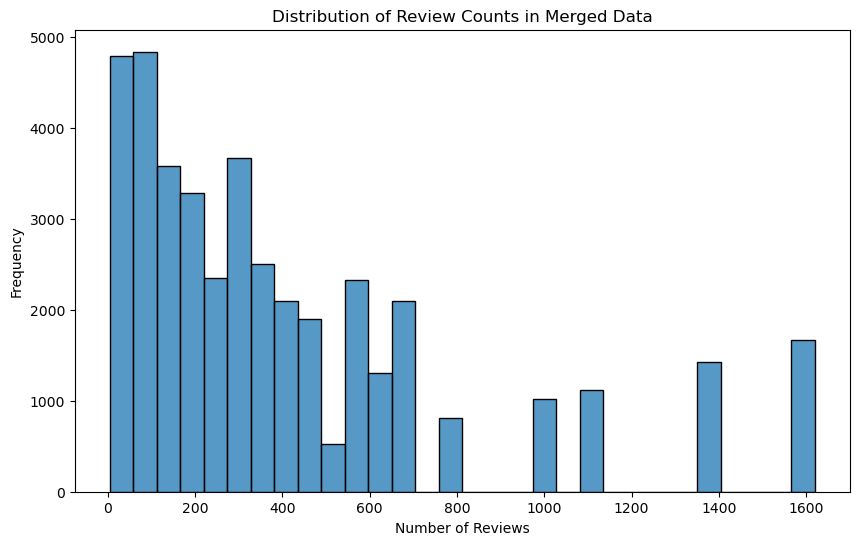

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(merged_data['review_count'], bins=30, kde=False)
plt.title('Distribution of Review Counts in Merged Data')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()



In [49]:

mean_review_count = merged_data['review_count'].mean()
median_review_count = merged_data['review_count'].median()
std_review_count = merged_data['review_count'].std()
min_review_count = merged_data['review_count'].min()
max_review_count = merged_data['review_count'].max()


quantile_25 = merged_data['review_count'].quantile(0.25)
quantile_75 = merged_data['review_count'].quantile(0.75)


print(f"Mean Review Count: {mean_review_count}")
print(f"Median Review Count: {median_review_count}")
print(f"Standard Deviation of Review Count: {std_review_count}")
print(f"Minimum Review Count: {min_review_count}")
print(f"Maximum Review Count: {max_review_count}")
print(f"25th Percentile: {quantile_25}")
print(f"75th Percentile: {quantile_75}")


Mean Review Count: 419.1356769320163
Median Review Count: 305.0
Standard Deviation of Review Count: 405.72933166844314
Minimum Review Count: 5
Maximum Review Count: 1619
25th Percentile: 124.0
75th Percentile: 567.0


In [103]:
#chose reviews from 124 so the 25th percentile 
#look at attribute category and t-statistics

import scipy.stats as stats

# List of attribute columns - replace this with your actual list of attributes
attribute_columns = ['AgesAllowed',
 'Alcohol',
 'Ambience',
 'DogsAllowed',
 
 'GoodForDancing',
 'GoodForKids',


 'Music',
 'Smoking',
 'WheelchairAccessible',
 'WiFi']

for attribute in attribute_columns:
    with_attribute = merged_data[merged_data[attribute] == 1]['stars_x']
    without_attribute = merged_data[merged_data[attribute] == 0]['stars_x']
    t_stat, p_value = stats.ttest_ind(with_attribute, without_attribute, nan_policy='omit')
    print(f"{attribute}: t-statistic = {t_stat}, p-value = {p_value}")
# T-Statistic:

# A measure of the difference between the two groups (with and without the attribute) relative to the variation in the sample data.
# A higher absolute value of the t-statistic indicates a greater difference between the two groups.    
# The direction of the impact (positive or negative) is indicated by the t-statistic. A positive t-statistic suggests higher ratings when the attribute is present, while a negative t-statistic indicates higher ratings when the attribute is absent.
    
# DogsAllowed:
# T-test: T-statistic = 123.635, P-value = 0.0. This indicates a very significant difference in ratings, with higher ratings for businesses that allow dogs.
# Average Ratings: AvgRatingWith (4.158325) is higher than AvgRatingWithout (3.809271). This confirms that businesses allowing dogs tend to have higher ratings.


AgesAllowed: t-statistic = -15.482210290411617, p-value = 6.487581210724267e-54
Alcohol: t-statistic = 22.741553767034308, p-value = 8.718902833824104e-114
Ambience: t-statistic = 10.01358656896556, p-value = 1.413398621861633e-23
DogsAllowed: t-statistic = 123.63522418841335, p-value = 0.0
GoodForDancing: t-statistic = 52.796643998131046, p-value = 0.0
GoodForKids: t-statistic = -6.043924026477165, p-value = 1.5169569271676133e-09
Music: t-statistic = 51.07078060820397, p-value = 0.0
Smoking: t-statistic = 53.27658641114291, p-value = 0.0
WheelchairAccessible: t-statistic = 111.63969169949118, p-value = 0.0
WiFi: t-statistic = 38.56628017423949, p-value = 0.0


In [104]:
import pandas as pd
import numpy as np

# List of attribute columns - replace this with your actual list of attributes
attribute_columns = ['AgesAllowed',
 'Alcohol',
 'Ambience',
 'DogsAllowed',
 
 'GoodForDancing',
 'GoodForKids',


 'Music',
 'Smoking',
 'WheelchairAccessible',
 'WiFi']

# Create a list to store correlations
correlations = []

# Calculate the correlation between each attribute and average ratings
for attribute in attribute_columns:
    attribute_values = merged_data[attribute]
    correlation = np.corrcoef(attribute_values, merged_data['stars_x'])[0, 1]
    correlations.append({'Attribute': attribute, 'Correlation': correlation})

# Create a DataFrame from the list of correlations
correlations_df = pd.DataFrame(correlations)

# Print the correlations
print(correlations_df)



              Attribute  Correlation
0           AgesAllowed    -0.075961
1               Alcohol     0.111207
2              Ambience     0.049213
3           DogsAllowed     0.519734
4        GoodForDancing     0.251443
5           GoodForKids    -0.029726
6                 Music     0.243719
7               Smoking     0.253582
8  WheelchairAccessible     0.481468
9                  WiFi     0.186440


In [101]:
import pandas as pd

# Assuming you have a DataFrame called 'merged_data' with the necessary columns
# List of attribute columns - replace this with your actual list of attributes
attribute_columns = [
    'AgesAllowed', 'Alcohol', 'Ambience', 'BYOB', 'BYOBCorkage', 'BestNights',
    'BikeParking', 'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards',
    'BusinessParking', 'ByAppointmentOnly', 'Caters', 'CoatCheck', 'Corkage',
    'DogsAllowed', 'DriveThru', 'GoodForDancing', 'GoodForKids', 'GoodForMeal',
    'HappyHour', 'HasTV', 'Music', 'NoiseLevel', 'OutdoorSeating',
    'RestaurantsAttire', 'RestaurantsDelivery', 'RestaurantsGoodForGroups',
    'RestaurantsPriceRange2', 'RestaurantsReservations',
    'RestaurantsTableService', 'RestaurantsTakeOut', 'Smoking',
    'WheelchairAccessible', 'WiFi'
]

# Calculate the correlation matrix between 'stars_x' and the attribute columns
correlation_matrix = merged_data[['stars_x'] + attribute_columns].corr()

# Print the correlation matrix
print("Correlation between Attributes and Average Rating:")
print(correlation_matrix)


Correlation between Attributes and Average Rating:
                             stars_x  AgesAllowed   Alcohol  Ambience  \
stars_x                     1.000000    -0.075961  0.111207  0.049213   
AgesAllowed                -0.075961     1.000000 -0.196256 -0.230282   
Alcohol                     0.111207    -0.196256  1.000000  0.783669   
Ambience                    0.049213    -0.230282  0.783669  1.000000   
BYOB                        0.264728    -0.032208  0.099520  0.085272   
BYOBCorkage                -0.059042    -0.014806  0.045749  0.039199   
BestNights                  0.243632    -0.025903  0.080039  0.068580   
BikeParking                 0.041932     0.013395  0.474962  0.359027   
BusinessAcceptsBitcoin      0.323497    -0.039510  0.107713  0.083469   
BusinessAcceptsCreditCards  0.042129     0.007336  0.526162  0.503009   
BusinessParking             0.118407     0.006657  0.560452  0.508101   
ByAppointmentOnly           0.313279    -0.043320  0.083895  0.056867   


In [106]:
#attribute rating with or without
import pandas as pd


filtered_data = merged_data[merged_data['review_count'] >= 124]


attribute_columns = ['AgesAllowed',
 'Alcohol',
 'Ambience',
 'DogsAllowed',
 
 'GoodForDancing',
 'GoodForKids',


 'Music',
 'Smoking',
 'WheelchairAccessible',
 'WiFi']
                  



avg_ratings_list = []

for attribute in attribute_columns:
    avg_with_attribute = filtered_data[filtered_data[attribute] == 1]['stars_x'].mean()
    avg_without_attribute = filtered_data[filtered_data[attribute] == 0]['stars_x'].mean()
    avg_ratings_list.append({
        'Attribute': attribute,
        'AvgRatingWith': avg_with_attribute,
        'AvgRatingWithout': avg_without_attribute
    })


avg_ratings_df = pd.DataFrame(avg_ratings_list)
avg_ratings_df

# * No bar: businesses with or without the specific attribute in your dataset. 
# * Significantly Higher Ratings: Attributes like BestNights, GoodForDancing, Music, and Smoking 
# * Slightly Higher or Comparable Ratings: Attributes such as Alcohol, Ambience, BYOB, and WiFi Attributes with Lower Ratings When Present:
# * Significantly Lower Ratings: DogsAllowed shows a noticeable drop in average rating when present. 
# * Ratings Not Affected Significantly: Several attributes, such as BusinessAcceptsCreditCards, HasTV, and RestaurantsReservations, show minimal differences in average ratings whether they are present or not. This could indicate that these features are standard expectations and don't significantly influence customer satisfaction.
# * Notably Higher Ratings When Absent: GoodForKids and NoiseLevel have higher average ratings when absent, which might suggest that businesses not suitable for kids or those with lower noise levels are preferred by certain customers.
# * Attributes with No Data on Impact: For attributes like RestaurantsDelivery, RestaurantsPriceRange2, and RestaurantsTakeOut, where one of the average ratings is NaN, it's difficult to draw conclusions since there's no comparative data.



,Attribute,AvgRatingWith,AvgRatingWithout
0,AgesAllowed,NaN,4.111769
1,Alcohol,4.112392,4.000000
2,Ambience,4.112392,4.000000
3,DogsAllowed,4.158325,3.809271
4,GoodForDancing,4.313383,4.066143
5,GoodForKids,4.108581,4.263281
6,Music,4.290521,4.067342
7,Smoking,4.304292,4.059641
8,WheelchairAccessible,4.188096,3.940103
9,WiFi,4.112867,4.000000


In [53]:
import pandas as pd


filtered_data = merged_data[merged_data['review_count'] >= 124]


attribute_columns = [
    'Alcohol', 'Ambience','DogsAllowed',
    'GoodForDancing', 'GoodForKids', 'Music', 'NoiseLevel','RestaurantsAttire',
    'Smoking', 'WheelchairAccessible', 'WiFi'
]


avg_ratings_list = []

for attribute in attribute_columns:
    avg_with_attribute = filtered_data[filtered_data[attribute] == 1]['stars_x'].mean()
    avg_without_attribute = filtered_data[filtered_data[attribute] == 0]['stars_x'].mean()
    avg_ratings_list.append({
        'Attribute': attribute,
        'AvgRatingWith': avg_with_attribute,
        'AvgRatingWithout': avg_without_attribute
    })


avg_ratings_df = pd.DataFrame(avg_ratings_list)
avg_ratings_df

# * No bar: businesses with or without the specific attribute in your dataset. 
# * Significantly Higher Ratings: Attributes like BestNights, GoodForDancing, Music, and Smoking 
# * Slightly Higher or Comparable Ratings: Attributes such as Alcohol, Ambience, BYOB, and WiFi Attributes with Lower Ratings When Present:
# * Significantly Lower Ratings: DogsAllowed shows a noticeable drop in average rating when present. 
# * Ratings Not Affected Significantly: Several attributes, such as BusinessAcceptsCreditCards, HasTV, and RestaurantsReservations, show minimal differences in average ratings whether they are present or not. This could indicate that these features are standard expectations and don't significantly influence customer satisfaction.
# * Notably Higher Ratings When Absent: GoodForKids and NoiseLevel have higher average ratings when absent, which might suggest that businesses not suitable for kids or those with lower noise levels are preferred by certain customers.
# * Attributes with No Data on Impact: For attributes like RestaurantsDelivery, RestaurantsPriceRange2, and RestaurantsTakeOut, where one of the average ratings is NaN, it's difficult to draw conclusions since there's no comparative data.



,Attribute,AvgRatingWith,AvgRatingWithout
0,Alcohol,4.112392,4.000000
1,Ambience,4.112392,4.000000
2,DogsAllowed,4.158325,3.809271
3,GoodForDancing,4.313383,4.066143
4,GoodForKids,4.108581,4.263281
5,Music,4.290521,4.067342
6,NoiseLevel,4.105520,4.327055
7,RestaurantsAttire,4.107081,4.256410
8,Smoking,4.304292,4.059641
9,WheelchairAccessible,4.188096,3.940103


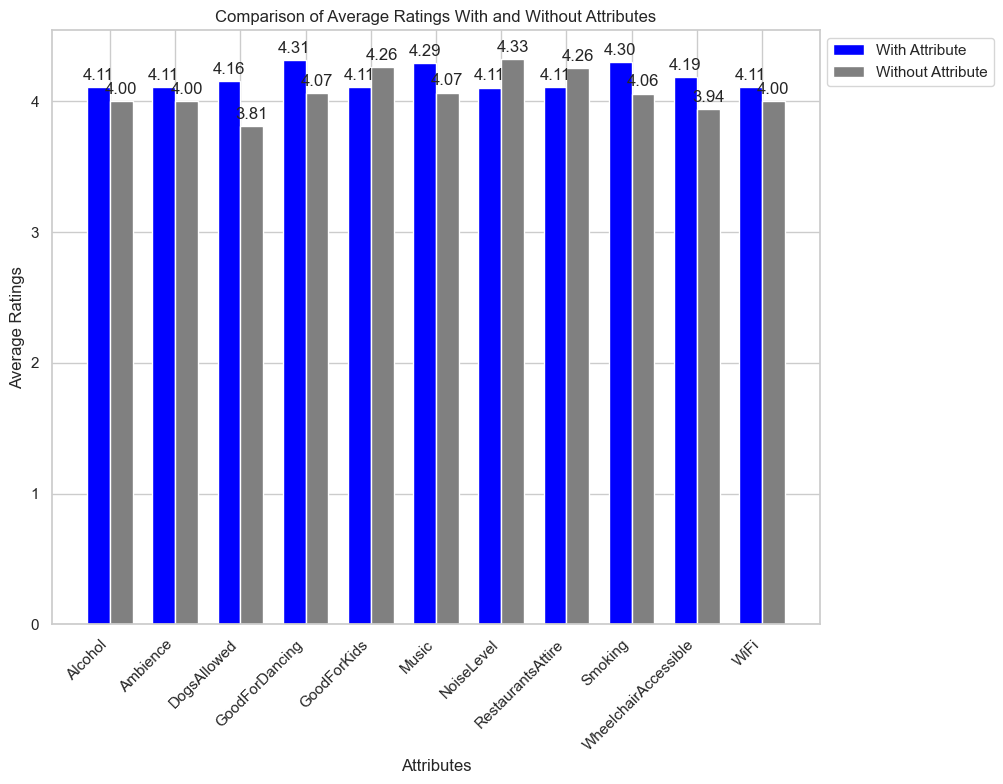

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming avg_ratings_df is already created as per your code

# Set a professional plot style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the 'AvgRatingWith' and 'AvgRatingWithout' side by side for each attribute
width = 0.35  # Width of the bars
ind = range(len(avg_ratings_df))  # the x locations for the groups

# Creating two bar plots for with and without the attribute, in white and blue
bars1 = ax.bar(ind, avg_ratings_df['AvgRatingWith'], width, label='With Attribute', color='blue')
bars2 = ax.bar([p + width for p in ind], avg_ratings_df['AvgRatingWithout'], width, label='Without Attribute', color='grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Attributes')
ax.set_ylabel('Average Ratings')
ax.set_title('Comparison of Average Ratings With and Without Attributes')
ax.set_xticks([p + width / 2 for p in ind])
ax.set_xticklabels(avg_ratings_df['Attribute'], rotation=45, ha='right')

# Move the legend to the side of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding the average values on top of the bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

# Adjust layout to accommodate the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()



In [55]:
from collections import Counter
import re
import pandas as pd

# Sample DataFrame
# Replace with your actual DataFrame: merged_data = pd.read_csv('your_data.csv')

keyword_groups = {
    "kids": ["kids", "children", "child"],
    "music_dancing": ["dancing", "music", "dance", "party"],
    "smoking": ["smoker", "cigarettes", "hookah", "smoke", "tobacco",'vape'],
    "alcohol": ["alcohol", "drinks", "mocktail", "cocktail", "beer", "wine", "spirits",'happyhour'],
    "ambience": ["atmosphere", "ambience", "vibe", "artsy", "environment", "mood",'outside','accessible','wheelchair','ada','friendly','server','service','waiter','waitress'],
    "animals": ["animals", "dogs", "cats", "pets",'pet','furry'],
    "dress": ["dress", "attire", "outfit", "clothing", "fashion",'formal'],
    "coat_check": ["coat check", "cloakroom"],
    "tv": ["tv", "television"],
    "wifi": ["wifi", "wi-fi", "internet",'connection'],
    "reservation": ["reservation", "booking",'inadvance','appointment'],
    "payment_methods": ["credit cards", "venmo", "apple pay", "cash", "debit", "payment"],
    "noise_level": ["noise level", "loud", "quiet", "noisy", "sound", "volume"],
    'parking':['parking']
    
}


def get_keyword_context(text, keyword, window=2):
    context_pattern = fr'(\b\w+\b(?:\W+\b\w+\b){{0,{window-1}}})\W+{keyword}\W+((?:\b\w+\b\W+){{0,{window-1}}}\b\w+\b)'
    
    contexts = re.findall(context_pattern, text, re.IGNORECASE)
    return [f"{pre_context} {keyword} {post_context}" for pre_context, post_context in contexts]

# Analyze context for each keyword in each group
for group, keywords in keyword_groups.items():
    group_contexts = []
    for keyword in keywords:
        contexts = [context for text in merged_data['text'] for context in get_keyword_context(text, keyword)]
        group_contexts.extend(contexts)
    
    # Count and display the most common phrases
    top_contexts = Counter(group_contexts).most_common(20)
    print(f"Top contexts for '{group}':")
    for phrase, count in top_contexts:
        print(f"  '{phrase}': {count}")
    print("\n")


Top contexts for 'kids':
  'My kids and I': 3
  'we had kids with us': 3
  'leave the kids at home': 3
  'from the kids menu as': 2
  'Anywho, the kids alternate days': 2
  'bribe the kids and tell': 2
  'ordered the kids Mac and': 2
  'of my kids ordered. I': 2
  'and my kids eat like': 2
  'like most kids come on': 2
  'yummy. My kids 20 pancakes': 2
  'without the kids and had': 2
  'training these kids at these': 2
  'that my kids love Steak': 2
  'wife and kids got hot': 2
  's a kids table towards': 2
  'section with kids The host': 2
  'good for kids those who': 2
  'have a kids menu and': 2
  'bribe the kids I let': 2


Top contexts for 'music_dancing':
  'had a party of 8': 6
  'had a party of 6': 6
  'for a party of two': 5
  'for a party of 6': 5
  'for a party of 2': 5
  'your entire party is present': 5
  'were a party of 6': 4
  'with a party of 4': 4
  'in my party had the': 4
  'with a party of 5': 4
  'a large party in the': 4
  'with a party of 6': 4
  'with a party o

In [56]:
#this might be a better approach
keyword_groups = {
    "kids_allowed": [
        "kids welcome", "child-friendly", "good for kids", "children allowed", "suitable for children", 
        "family-friendly", "welcomes children", "kid-approved", "children-friendly environment", "safe for kids",'kids allowed','allowed kids','children allowed','kids ordered'
    ],
    "kids_not_allowed": [
        "no kids", "not good for kids", "children not allowed", "kids not welcome", "adults only", 
        "not child-friendly", "no children", "not suitable for children", "kid-free zone", "children restricted"
    ],
    "music_positive": [
        "great music", "live music", "dance floor", "good music", "music was good", "excellent playlist", 
        "fantastic music", "enjoyable music", "live band", "good tunes"
    ],
    "music_negative": [
        "noisy music", "loud music", "music too loud", "overpowering music", "annoying music", 
        "distracting music", "unpleasant music", "too loud sound", "disruptive music", "aggressive music"
    ],
    "smoking_allowed": [
        "smoking area", "smoker friendly", "vape allowed", "can smoke", "smoking zone", 
        "smoking permitted", "smoker's corner", "designated smoking area", "smoking lounge", "smoking section"
    ],
    "smoking_not_allowed": [
        "no smoking", "smoke-free", "non-smoking", "smoking prohibited", "no smoking allowed", 
        "smoking not permitted", "smoke-free environment", "non-smoking area", "clean air", "no tobacco"
    ],
    "alcohol_served": [
        "alcohol", "full bar", "happy hour", "cocktails", "beer", "wine", "spirits", "liquor served", 
        "drinks available", "bar service"
    ],
    "alcohol_not_served": [
        "no alcohol", "alcohol-free", "dry establishment", "non-alcoholic", "no liquor", 
        "booze-free", "no beer", "no wine", "alcohol restricted", "zero alcohol"
    ],
    "ambience_positive": [
        "cozy", "great ambience", "nice vibe", "friendly staff", "welcoming atmosphere", 
        "pleasant setting", "relaxing environment", "charming decor", "inviting space", "warm atmosphere"
    ],
    "ambience_negative": [
        "poor service", "rude staff", "too crowded", "noisy", "unpleasant atmosphere", 
        "cramped space", "unfriendly vibe", "bad lighting", "overcrowded", "uncomfortable seating"
    ],
   
    "animals_allowed": [
        "pets allowed", "dog-friendly", "animal friendly", "pet-friendly", "welcome pets",
        "allows animals", "pets welcome", "dog allowed", "cat friendly", "service animals accepted"
    ],
    "animals_not_allowed": [
        "no pets", "pets not allowed", "no dogs", "no animals", "non-pet-friendly",
        "no pets allowed", "animals not welcome", "no pet policy", "service animals only", "pet restrictions"
    ],
    "formal_dress_required": [
        "dress code", "formal attire", "smart dress", "formal wear required", "elegant dress",
        "black tie", "evening wear", "jacket required", "smart casual", "business attire"
    ],
    "casual_dress": [
        "casual dress", "no dress code", "informal dress", "casual attire", "dress casually",
        "relaxed dress code", "casual wear", "informal attire", "comfortable clothing", "no formal dress"
    ],
    "coat_check_available": [
        "coat check available", "cloakroom", "coat service", "coat room", "luggage storage",
        "checkroom", "bag check", "cloak service", "coat storage", "personal item storage"
    ],
    "no_coat_check": [
        "no coat check", "no cloakroom", "no luggage storage", "bring your own coat", "no coat service",
        "no checkroom", "no bag check", "carry your own items", "no personal item storage", "self-service coats"
    ],
    "tv_available": [
        "television", "sports on tv", "tv available", "screening sports", "live games on tv",
        "flat screen tv", "cable tv", "news on tv", "tv screens", "video entertainment"
    ],
    "no_tv": [
        "no television", "no tv", "no screens", "tv-free", "screen-free",
        "no live games", "no cable tv", "tv-less", "no video entertainment", "no sports screening"
    ],
    "wifi_available": [
        "free wifi", "wifi available", "internet access", "public wifi", "wireless internet",
        "complimentary wifi", "wifi service", "internet service", "wireless access", "hotspot"
    ],
    "no_wifi": [
        "no wifi", "no internet", "wifi unavailable", "no wireless internet", "internet-free",
        "no public wifi", "no wifi service", "no internet access", "wifi restricted", "no hotspot"
    ],
    "reservations_required": [
        "booking required", "reservations needed", "reservation recommended", "advance booking", "table reservation",
        "book in advance", "pre-booking", "reservation only", "call to book", "reserve a table"
    ],
    "no_reservations": [
        "no reservations", "walk-ins welcome", "no booking needed", "first come first serve", "no reservation required",
        "non-reservable", "walk-in only", "no advance booking", "no call to book", "no table reservation"
    ],
    "payment_methods_variety": [
        "credit cards accepted", "cash only", "accepts cards", "digital payment", "contactless payment",
        "accepts Apple Pay", "debit cards", "mobile payments", "cash and cards", "online payment"
    ],
    "limited_payment_methods": [
        "cash preferred", "no credit cards", "cash transactions", "no digital payment", "no contactless payment",
        "cash only", "no debit cards", "no mobile payments", "cash only establishment", "no online payment"
    ],
    "low_noise_level": [
        "quiet", "peaceful", "mellow", "tranquil", "moderate noise",
        "soft music", "relaxed atmosphere", "quiet environment", "low background noise", "serene"
    ],
    "high_noise_level": [
        "noisy", "loud", "boisterous", "busy", "bustling",
        "loud music", "noisy crowd", "high volume", "loud environment", "energetic atmosphere"
    ],
    "parking_available": [
        "parking available", "street parking", "valet parking", "free parking", "parking lot",
        "private parking", "garage parking", "paid parking", "parking garage", "bike parking"
    ],
    "no_parking": [
        "no parking", "limited parking", "no street parking", "no valet parking", "parking difficult",
        "no free parking", "no private parking", "no garage parking", "parking challenging", "no bike parking"
    ]
}

def count_keyword_occurrences(text, keywords):
    text_lower = text.lower()
    return sum(text_lower.count(keyword) for keyword in keywords)

# Counting keyword mentions for each group
keyword_mentions = {}
for group, keywords in keyword_groups.items():
    total_mentions = sum(merged_data['text'].apply(lambda x: count_keyword_occurrences(x, keywords)))
    keyword_mentions[group] = total_mentions

# Display the count of mentions for each keyword group
for group, count in keyword_mentions.items():
    print(f"{group}: {count}")


kids_allowed: 37
kids_not_allowed: 8
music_positive: 123
music_negative: 20
smoking_allowed: 3
smoking_not_allowed: 7
alcohol_served: 4871
alcohol_not_served: 54
ambience_positive: 1370
ambience_negative: 334
animals_allowed: 13
animals_not_allowed: 1
formal_dress_required: 13
casual_dress: 3
coat_check_available: 0
no_coat_check: 0
tv_available: 30
no_tv: 3
wifi_available: 127
no_wifi: 0
reservations_required: 25
no_reservations: 54
payment_methods_variety: 95
limited_payment_methods: 91
low_noise_level: 570
high_noise_level: 4024
parking_available: 819
no_parking: 30


In [57]:


keyword_groups = {
    "kids_allowed": [
        "kids welcome", "child-friendly", "good for kids", "children allowed", "suitable for children", 
        "family-friendly", "welcomes children", "kid-approved", "children-friendly environment", "safe for kids",'kids allowed','allowed kids','children allowed','kids ordered'
    ],
    "kids_not_allowed": [
        "no kids", "not good for kids", "children not allowed", "kids not welcome", "adults only", 
        "not child-friendly", "no children", "not suitable for children", "kid-free zone", "children restricted"
    ],
    "music_positive": [
        "great music", "live music", "dance floor", "good music", "music was good", "excellent playlist", 
        "fantastic music", "enjoyable music", "live band", "good tunes"
    ],
    "music_negative": [
        "noisy music", "loud music", "music too loud", "overpowering music", "annoying music", 
        "distracting music", "unpleasant music", "too loud sound", "disruptive music", "aggressive music"
    ],
    "smoking_allowed": [
        "smoking area", "smoker friendly", "vape allowed", "can smoke", "smoking zone", 
        "smoking permitted", "smoker's corner", "designated smoking area", "smoking lounge", "smoking section"
    ],
    "smoking_not_allowed": [
        "no smoking", "smoke-free", "non-smoking", "smoking prohibited", "no smoking allowed", 
        "smoking not permitted", "smoke-free environment", "non-smoking area", "clean air", "no tobacco"
    ],
    "alcohol_served": [
        "alcohol", "full bar", "happy hour", "cocktails", "beer", "wine", "spirits", "liquor served", 
        "drinks available", "bar service"
    ],
    "alcohol_not_served": [
        "no alcohol", "alcohol-free", "dry establishment", "non-alcoholic", "no liquor", 
        "booze-free", "no beer", "no wine", "alcohol restricted", "zero alcohol"
    ],
    "ambience_positive": [
        "cozy", "great ambience", "nice vibe", "friendly staff", "welcoming atmosphere", 
        "pleasant setting", "relaxing environment", "charming decor", "inviting space", "warm atmosphere"
    ],
    "ambience_negative": [
        "poor service", "rude staff", "too crowded", "noisy", "unpleasant atmosphere", 
        "cramped space", "unfriendly vibe", "bad lighting", "overcrowded", "uncomfortable seating"
    ],
   
    "animals_allowed": [
        "pets allowed", "dog-friendly", "animal friendly", "pet-friendly", "welcome pets",
        "allows animals", "pets welcome", "dog allowed", "cat friendly", "service animals accepted"
    ],
    "animals_not_allowed": [
        "no pets", "pets not allowed", "no dogs", "no animals", "non-pet-friendly",
        "no pets allowed", "animals not welcome", "no pet policy", "service animals only", "pet restrictions"
    ],
    "formal_dress_required": [
        "dress code", "formal attire", "smart dress", "formal wear required", "elegant dress",
        "black tie", "evening wear", "jacket required", "smart casual", "business attire"
    ],
    "casual_dress": [
        "casual dress", "no dress code", "informal dress", "casual attire", "dress casually",
        "relaxed dress code", "casual wear", "informal attire", "comfortable clothing", "no formal dress"
    ],
    "coat_check_available": [
        "coat check available", "cloakroom", "coat service", "coat room", "luggage storage",
        "checkroom", "bag check", "cloak service", "coat storage", "personal item storage"
    ],
    "no_coat_check": [
        "no coat check", "no cloakroom", "no luggage storage", "bring your own coat", "no coat service",
        "no checkroom", "no bag check", "carry your own items", "no personal item storage", "self-service coats"
    ],
    "tv_available": [
        "television", "sports on tv", "tv available", "screening sports", "live games on tv",
        "flat screen tv", "cable tv", "news on tv", "tv screens", "video entertainment"
    ],
    "no_tv": [
        "no television", "no tv", "no screens", "tv-free", "screen-free",
        "no live games", "no cable tv", "tv-less", "no video entertainment", "no sports screening"
    ],
    "wifi_available": [
        "free wifi", "wifi available", "internet access", "public wifi", "wireless internet",
        "complimentary wifi", "wifi service", "internet service", "wireless access", "hotspot"
    ],
    "no_wifi": [
        "no wifi", "no internet", "wifi unavailable", "no wireless internet", "internet-free",
        "no public wifi", "no wifi service", "no internet access", "wifi restricted", "no hotspot"
    ],
    "reservations_required": [
        "booking required", "reservations needed", "reservation recommended", "advance booking", "table reservation",
        "book in advance", "pre-booking", "reservation only", "call to book", "reserve a table"
    ],
    "no_reservations": [
        "no reservations", "walk-ins welcome", "no booking needed", "first come first serve", "no reservation required",
        "non-reservable", "walk-in only", "no advance booking", "no call to book", "no table reservation"
    ],
    "payment_methods_variety": [
        "credit cards accepted", "cash only", "accepts cards", "digital payment", "contactless payment",
        "accepts Apple Pay", "debit cards", "mobile payments", "cash and cards", "online payment"
    ],
    "limited_payment_methods": [
        "cash preferred", "no credit cards", "cash transactions", "no digital payment", "no contactless payment",
        "cash only", "no debit cards", "no mobile payments", "cash only establishment", "no online payment"
    ],
    "low_noise_level": [
        "quiet", "peaceful", "mellow", "tranquil", "moderate noise",
        "soft music", "relaxed atmosphere", "quiet environment", "low background noise", "serene"
    ],
    "high_noise_level": [
        "noisy", "loud", "boisterous", "busy", "bustling",
        "loud music", "noisy crowd", "high volume", "loud environment", "energetic atmosphere"
    ],
    "parking_available": [
        "parking available", "street parking", "valet parking", "free parking", "parking lot",
        "private parking", "garage parking", "paid parking", "parking garage", "bike parking"
    ],
    "no_parking": [
        "no parking", "limited parking", "no street parking", "no valet parking", "parking difficult",
        "no free parking", "no private parking", "no garage parking", "parking challenging", "no bike parking"
    ]
}

from textblob import TextBlob
import re
import numpy as np

def find_group_sentiment(text, keywords):
    lower_text = text.lower()
    compiled_keywords = [re.compile(r'\b' + keyword + r'\b') for keyword in keywords]
    sentences = [sentence for sentence in TextBlob(lower_text).sentences 
                 if any(compiled_keyword.search(str(sentence).lower()) for compiled_keyword in compiled_keywords)]
    sentiments = [sentence.sentiment.polarity for sentence in sentences]
    return np.mean(sentiments) if sentiments else None


In [58]:
for group, keywords in keyword_groups.items():
    merged_data[group + '_sentiment'] = merged_data['text'].apply(lambda x: find_group_sentiment(x, keywords))


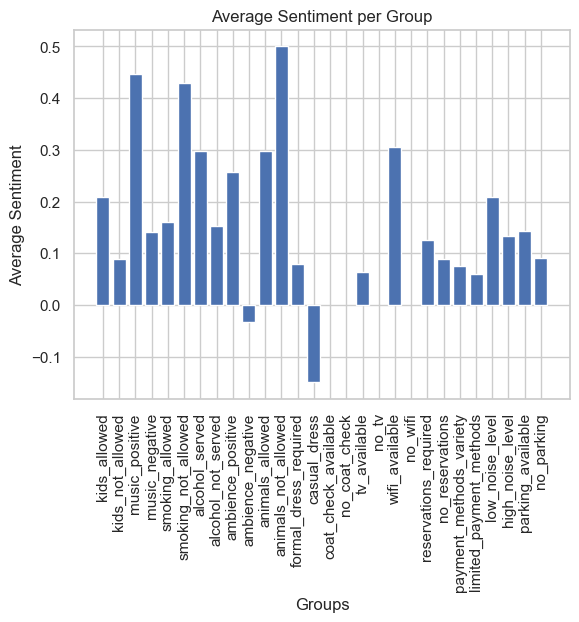

In [59]:
import matplotlib.pyplot as plt

# Sentiment Visualization
average_sentiments = [merged_data[group + '_sentiment'].mean() for group in keyword_groups.keys()]
plt.bar(keyword_groups.keys(), average_sentiments)
plt.xticks(rotation=90)
plt.title('Average Sentiment per Group')
plt.xlabel('Groups')
plt.ylabel('Average Sentiment')
plt.show()


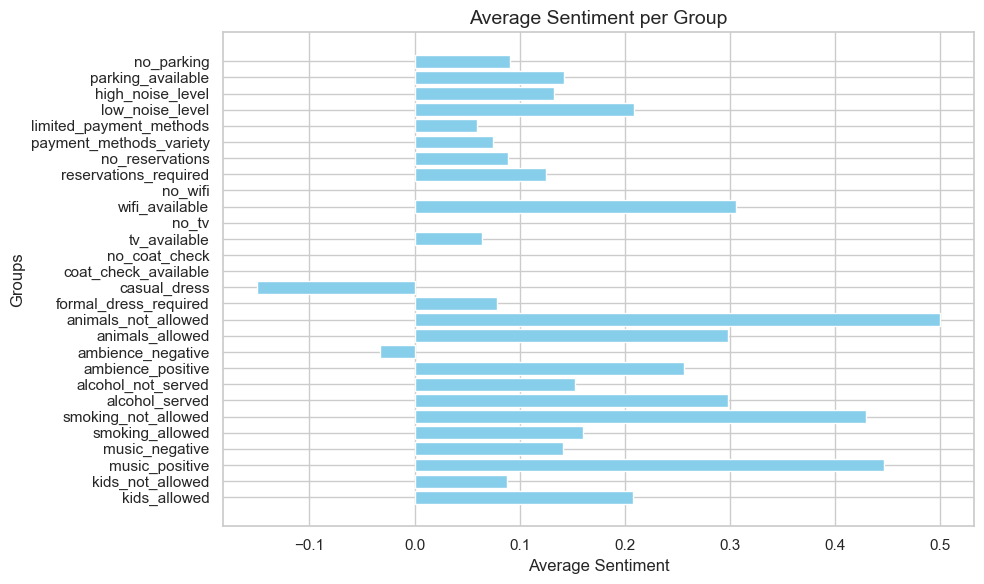

In [60]:
import matplotlib.pyplot as plt

# Assuming average_sentiments and keyword_groups are defined as per your code

# Increase the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart for better visibility of group names
plt.barh(list(keyword_groups.keys()), average_sentiments, color='skyblue')

# Add titles and labels with a readable font size
plt.title('Average Sentiment per Group', fontsize=14)
plt.xlabel('Average Sentiment', fontsize=12)
plt.ylabel('Groups', fontsize=12)

# Adjust layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()


In [82]:
keyword_groups = {
    "kids_allowed": [
        "kids welcome", "child-friendly", "good for kids", "children allowed", "suitable for children", 
        "family-friendly", "welcomes children", "kid-approved", "children-friendly environment", "safe for kids",'kids allowed','allowed kids','children allowed','kids ordered'
    ],
    "kids_not_allowed": [
        "no kids", "not good for kids", "children not allowed", "kids not welcome", "adults only", 
        "not child-friendly", "no children", "not suitable for children", "kid-free zone", "children restricted"
    ],
    "music_positive": [
        "great music", "live music", "dance floor", "good music", "music was good", "excellent playlist", 
        "fantastic music", "enjoyable music", "live band", "good tunes"
    ],
    "music_negative": [
        "noisy music", "loud music", "music too loud", "overpowering music", "annoying music", 
        "distracting music", "unpleasant music", "too loud sound", "disruptive music", "aggressive music"
    ],
    "smoking_allowed": [
        "smoking area", "smoker friendly", "vape allowed", "can smoke", "smoking zone", 
        "smoking permitted", "smoker's corner", "designated smoking area", "smoking lounge", "smoking section"
    ],
    "smoking_not_allowed": [
        "no smoking", "smoke-free", "non-smoking", "smoking prohibited", "no smoking allowed", 
        "smoking not permitted", "smoke-free environment", "non-smoking area", "clean air", "no tobacco"
    ],
    "alcohol_served": [
        "alcohol", "full bar", "happy hour", "cocktails", "beer", "wine", "spirits", "liquor served", 
        "drinks available", "bar service"
    ],
    "alcohol_not_served": [
        "no alcohol", "alcohol-free", "dry establishment", "non-alcoholic", "no liquor", 
        "booze-free", "no beer", "no wine", "alcohol restricted", "zero alcohol"
    ],
    "ambience_positive": [
        "cozy", "great ambience", "nice vibe", "friendly staff", "welcoming atmosphere", 
        "pleasant setting", "relaxing environment", "charming decor", "inviting space", "warm atmosphere"
    ],
    "ambience_negative": [
        "poor service", "rude staff", "too crowded", "noisy", "unpleasant atmosphere", 
        "cramped space", "unfriendly vibe", "bad lighting", "overcrowded", "uncomfortable seating"
    ],
   
    "animals_allowed": [
        "pets allowed", "dog-friendly", "animal friendly", "pet-friendly", "welcome pets",
        "allows animals", "pets welcome", "dog allowed", "cat friendly", "service animals accepted"
    ],
    "animals_not_allowed": [
        "no pets", "pets not allowed", "no dogs", "no animals", "non-pet-friendly",
        "no pets allowed", "animals not welcome", "no pet policy", "service animals only", "pet restrictions"
    ],
    "reservations_required": [
        "booking required", "reservations needed", "reservation recommended", "advance booking", "table reservation",
        "book in advance", "pre-booking", "reservation only", "call to book", "reserve a table"
    ],
    "no_reservations": [
        "no reservations", "walk-ins welcome", "no booking needed", "first come first serve", "no reservation required",
        "non-reservable", "walk-in only", "no advance booking", "no call to book", "no table reservation"
    ]
}


<function matplotlib.pyplot.show(close=None, block=None)>

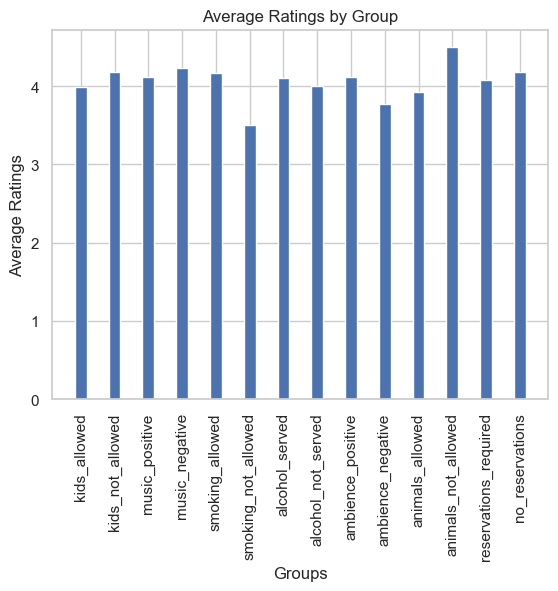

In [108]:
import numpy as np
import matplotlib.pyplot as plt
keyword_groups = {
    "kids_allowed": [
        "kids welcome", "child-friendly", "good for kids", "children allowed", "suitable for children", 
        "family-friendly", "welcomes children", "kid-approved", "children-friendly environment", "safe for kids",'kids allowed','allowed kids','children allowed','kids ordered'
    ],
    "kids_not_allowed": [
        "no kids", "not good for kids", "children not allowed", "kids not welcome", "adults only", 
        "not child-friendly", "no children", "not suitable for children", "kid-free zone", "children restricted"
    ],
    "music_positive": [
        "great music", "live music", "dance floor", "good music", "music was good", "excellent playlist", 
        "fantastic music", "enjoyable music", "live band", "good tunes"
    ],
    "music_negative": [
        "noisy music", "loud music", "music too loud", "overpowering music", "annoying music", 
        "distracting music", "unpleasant music", "too loud sound", "disruptive music", "aggressive music"
    ],
    "smoking_allowed": [
        "smoking area", "smoker friendly", "vape allowed", "can smoke", "smoking zone", 
        "smoking permitted", "smoker's corner", "designated smoking area", "smoking lounge", "smoking section"
    ],
    "smoking_not_allowed": [
        "no smoking", "smoke-free", "non-smoking", "smoking prohibited", "no smoking allowed", 
        "smoking not permitted", "smoke-free environment", "non-smoking area", "clean air", "no tobacco"
    ],
    "alcohol_served": [
        "alcohol", "full bar", "happy hour", "cocktails", "beer", "wine", "spirits", "liquor served", 
        "drinks available", "bar service"
    ],
    "alcohol_not_served": [
        "no alcohol", "alcohol-free", "dry establishment", "non-alcoholic", "no liquor", 
        "booze-free", "no beer", "no wine", "alcohol restricted", "zero alcohol"
    ],
    "ambience_positive": [
        "cozy", "great ambience", "nice vibe", "friendly staff", "welcoming atmosphere", 
        "pleasant setting", "relaxing environment", "charming decor", "inviting space", "warm atmosphere"
    ],
    "ambience_negative": [
        "poor service", "rude staff", "too crowded", "noisy", "unpleasant atmosphere", 
        "cramped space", "unfriendly vibe", "bad lighting", "overcrowded", "uncomfortable seating"
    ],
   
    "animals_allowed": [
        "pets allowed", "dog-friendly", "animal friendly", "pet-friendly", "welcome pets",
        "allows animals", "pets welcome", "dog allowed", "cat friendly", "service animals accepted"
    ],
    "animals_not_allowed": [
        "no pets", "pets not allowed", "no dogs", "no animals", "non-pet-friendly",
        "no pets allowed", "animals not welcome", "no pet policy", "service animals only", "pet restrictions"
    ],
    "reservations_required": [
        "booking required", "reservations needed", "reservation recommended", "advance booking", "table reservation",
        "book in advance", "pre-booking", "reservation only", "call to book", "reserve a table"
    ],
    "no_reservations": [
        "no reservations", "walk-ins welcome", "no booking needed", "first come first serve", "no reservation required",
        "non-reservable", "walk-in only", "no advance booking", "no call to book", "no table reservation"
    ]
}



def contains_keywords(text, keywords):
    lower_text = text.lower()
    return any(re.search(r'\b' + keyword + r'\b', lower_text) for keyword in keywords)

avg_ratings = []

for group, keywords in keyword_groups.items():
    merged_data[group + '_present'] = merged_data['text'].apply(lambda x: contains_keywords(x, keywords))
    avg_rating = merged_data[merged_data[group + '_present']]['stars_x'].mean()
    avg_ratings.append(avg_rating)

# Average Rating Visualization
x = np.arange(len(keyword_groups))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, avg_ratings, width, label='Average Rating')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Groups')
ax.set_ylabel('Average Ratings')
ax.set_title('Average Ratings by Group')
ax.set_xticks(x)
ax.set_xticklabels(keyword_groups.keys(), rotation=90)


plt.show



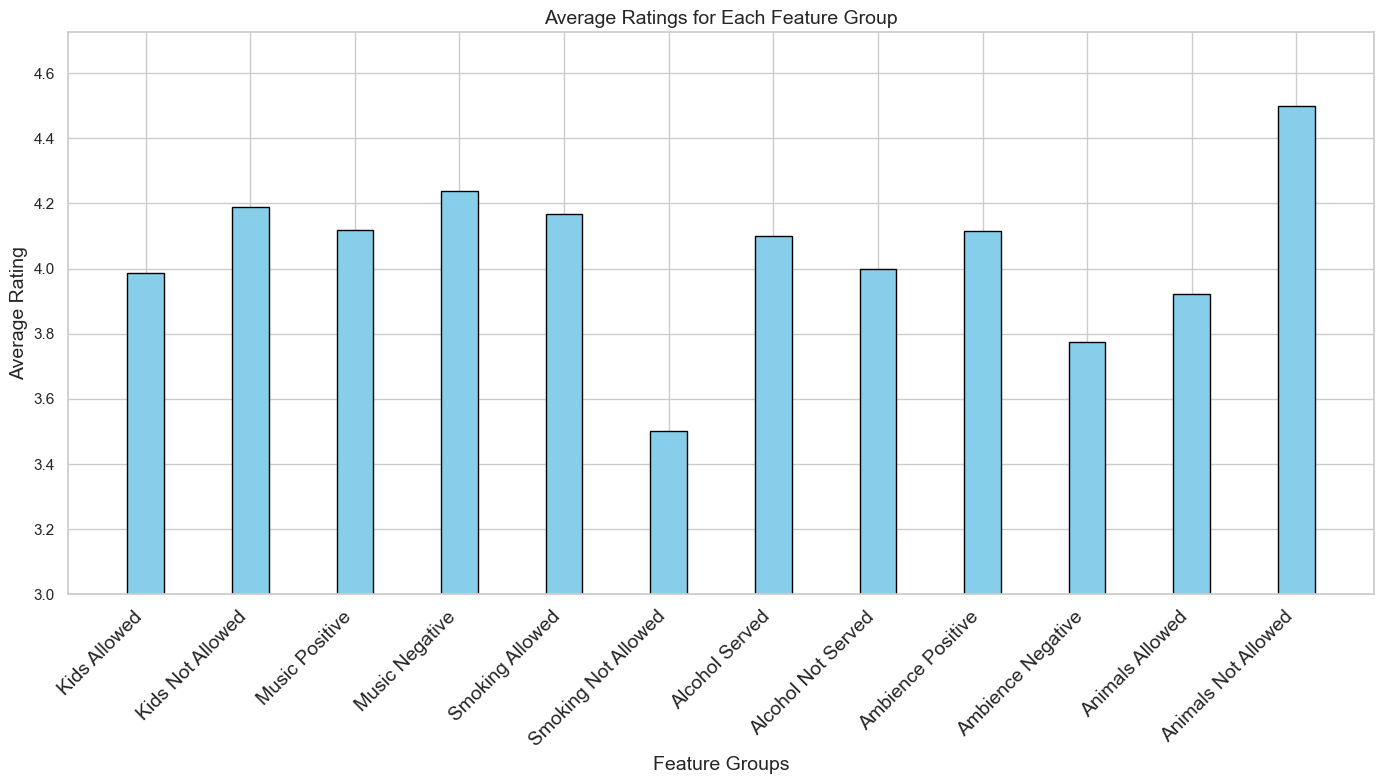

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import re

# Dummy data for 'merged_data' DataFrame and 'stars_x' column
# You'll need to replace this with your actual data
# merged_data = ...

# Assuming 'keyword_groups' is already defined in your workspace as shown earlier
keyword_groups = {
    "kids_allowed": [
        "kids welcome", "child-friendly", "good for kids", "children allowed", "suitable for children", 
        "family-friendly", "welcomes children", "kid-approved", "children-friendly environment", "safe for kids",'kids allowed','allowed kids','children allowed','kids ordered'
    ],
    "kids_not_allowed": [
        "no kids", "not good for kids", "children not allowed", "kids not welcome", "adults only", 
        "not child-friendly", "no children", "not suitable for children", "kid-free zone", "children restricted"
    ],
    "music_positive": [
        "great music", "live music", "dance floor", "good music", "music was good", "excellent playlist", 
        "fantastic music", "enjoyable music", "live band", "good tunes"
    ],
    "music_negative": [
        "noisy music", "loud music", "music too loud", "overpowering music", "annoying music", 
        "distracting music", "unpleasant music", "too loud sound", "disruptive music", "aggressive music"
    ],
    "smoking_allowed": [
        "smoking area", "smoker friendly", "vape allowed", "can smoke", "smoking zone", 
        "smoking permitted", "smoker's corner", "designated smoking area", "smoking lounge", "smoking section"
    ],
    "smoking_not_allowed": [
        "no smoking", "smoke-free", "non-smoking", "smoking prohibited", "no smoking allowed", 
        "smoking not permitted", "smoke-free environment", "non-smoking area", "clean air", "no tobacco"
    ],
    "alcohol_served": [
        "alcohol", "full bar", "happy hour", "cocktails", "beer", "wine", "spirits", "liquor served", 
        "drinks available", "bar service"
    ],
    "alcohol_not_served": [
        "no alcohol", "alcohol-free", "dry establishment", "non-alcoholic", "no liquor", 
        "booze-free", "no beer", "no wine", "alcohol restricted", "zero alcohol"
    ],
    "ambience_positive": [
        "cozy", "great ambience", "nice vibe", "friendly staff", "welcoming atmosphere", 
        "pleasant setting", "relaxing environment", "charming decor", "inviting space", "warm atmosphere"
    ],
    "ambience_negative": [
        "poor service", "rude staff", "too crowded", "noisy", "unpleasant atmosphere", 
        "cramped space", "unfriendly vibe", "bad lighting", "overcrowded", "uncomfortable seating"
    ],
   
    "animals_allowed": [
        "pets allowed", "dog-friendly", "animal friendly", "pet-friendly", "welcome pets",
        "allows animals", "pets welcome", "dog allowed", "cat friendly", "service animals accepted"
    ],
    "animals_not_allowed": [
        "no pets", "pets not allowed", "no dogs", "no animals", "non-pet-friendly",
        "no pets allowed", "animals not welcome", "no pet policy", "service animals only", "pet restrictions"
    ]
}

def contains_keywords(text, keywords):
    lower_text = text.lower()
    return any(re.search(r'\b' + keyword + r'\b', lower_text) for keyword in keywords)

# Calculate the average rating for each group
group_names = []
avg_ratings = []

for group, keywords in keyword_groups.items():
    # Apply the contains_keywords function to the 'text' column
    # Here, we assume that 'merged_data' has a 'text' column and 'stars_x' rating column
    merged_data[group + '_present'] = merged_data['text'].apply(lambda x: contains_keywords(x, keywords))
    
    # Calculate the mean rating for the rows where the keyword group is present
    avg_rating = merged_data[merged_data[group + '_present']]['stars_x'].mean()
    
    # Append the results to the lists
    group_names.append(group.replace('_', ' ').title())  # Clean up the group names for display
    avg_ratings.append(avg_rating)

# Now, create the bar chart
x = np.arange(len(group_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Create bars
ax.bar(x, avg_ratings, width, color='skyblue', edgecolor='black')

# Set the y-axis to start at 3
ax.set_ylim(bottom=3)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Groups', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)
ax.set_title('Average Ratings for Each Feature Group', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(group_names, rotation=45, ha='right', fontsize=14)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


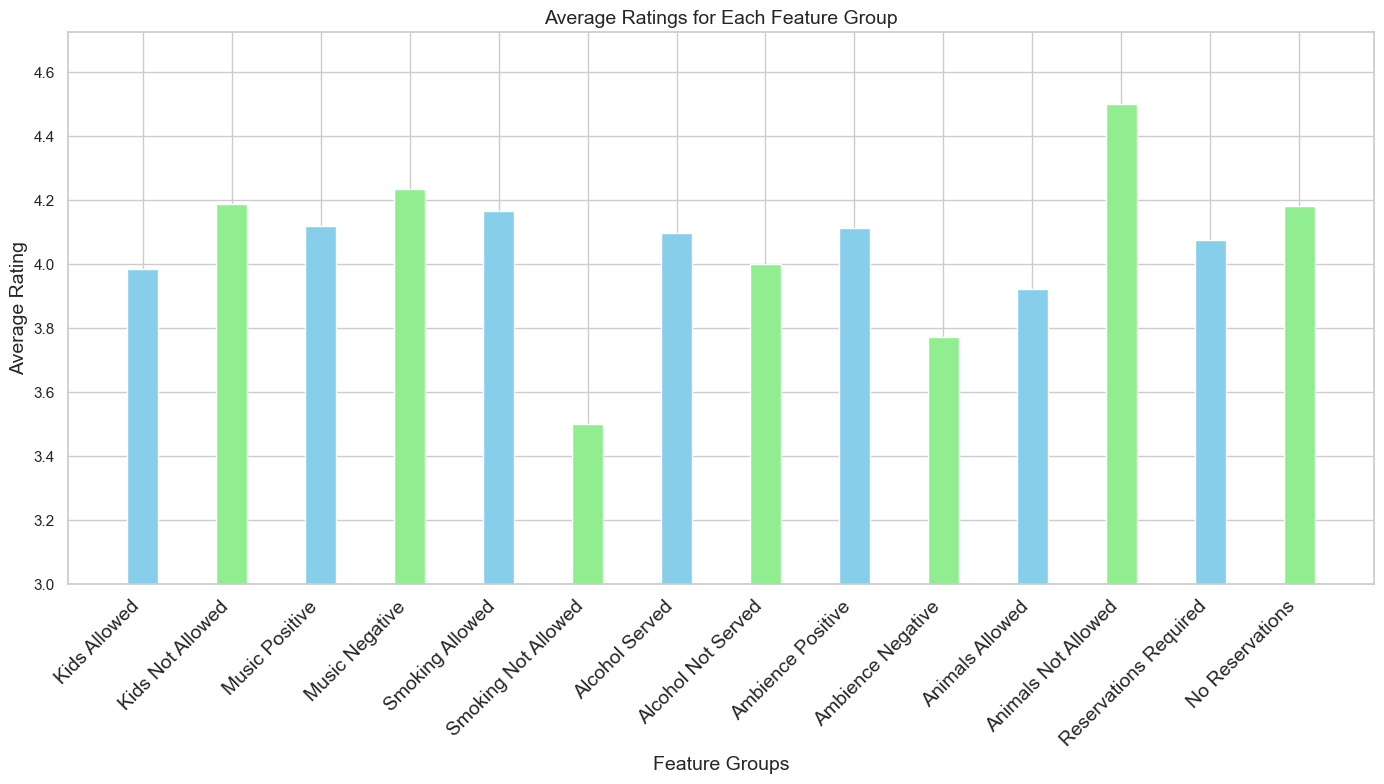

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming avg_ratings and keyword_groups are defined as per your previous messages

# Calculate the positions for each group's bar on the x-axis
x = np.arange(len(keyword_groups))  # the label locations for all groups
width = 0.35  # the width of the bars

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each group, with alternating colors
for i, (group_name, avg_rating) in enumerate(zip(keyword_groups.keys(), avg_ratings)):
    color = 'skyblue' if i % 2 == 0 else 'lightgreen'  # Alternate colors
    ax.bar(x[i], avg_rating, width, label=group_name.replace('_', ' ').title() if i < 2 else "", color=color)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Groups', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)
ax.set_title('Average Ratings for Each Feature Group', fontsize=14)

# Set the positions and labels of the x-ticks
ax.set_xticks(x)
ax.set_xticklabels([group.replace('_', ' ').title() for group in keyword_groups.keys()], rotation=45, ha='right', fontsize=14)

# Set the y-axis to start at 3
ax.set_ylim(bottom=3)

# Add a legend for the first two bars only to avoid repetition
handles, labels = ax.get_legend_handles_labels()


# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


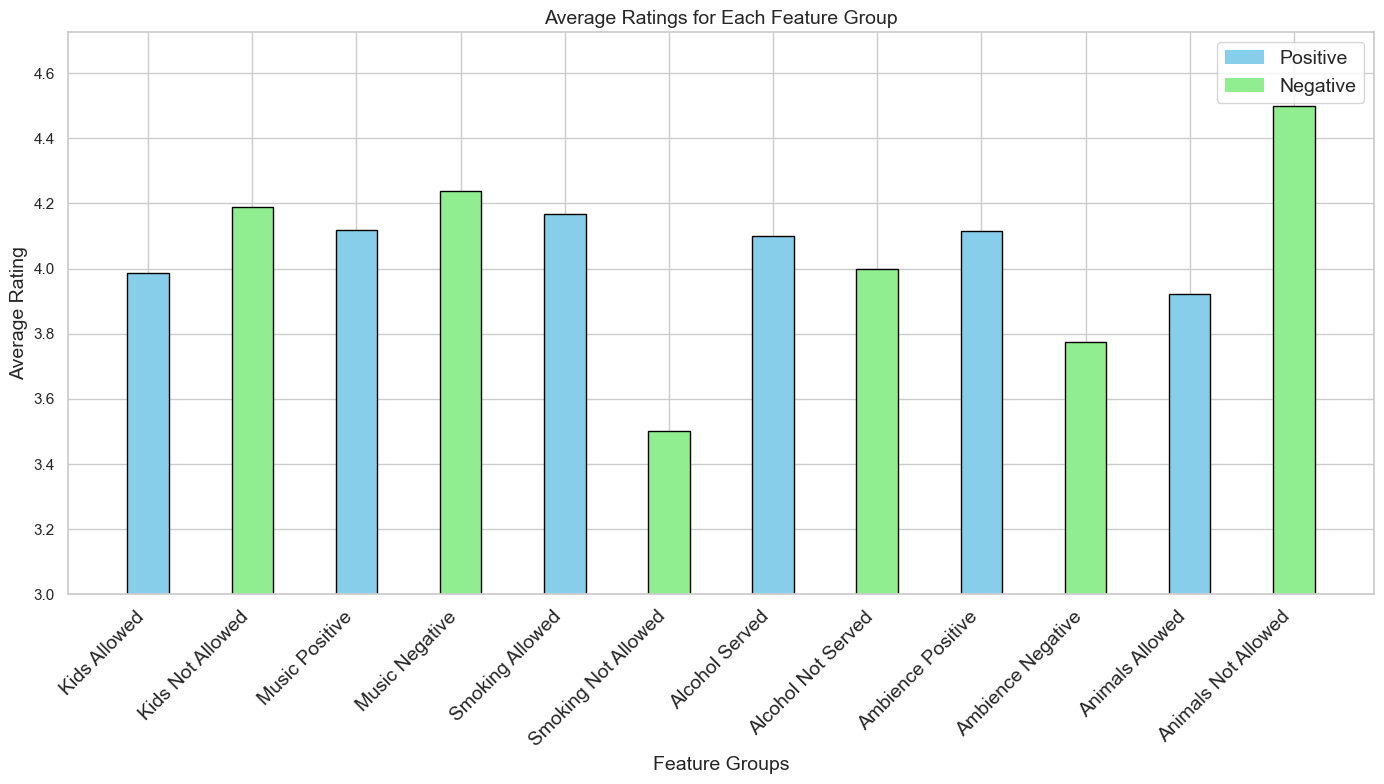

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming avg_ratings and keyword_groups are defined as per your previous messages

# Calculate the positions for each group's bar on the x-axis
x = np.arange(len(keyword_groups))  # the label locations for all groups
width = 0.4  # the width of the bars, increased to fill the gap

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each group, with adjacent bars touching each other
for i, (group_name, avg_rating) in enumerate(zip(keyword_groups.keys(), avg_ratings)):
    # Select color based on the group
    color = 'lightgreen' if 'not' in group_name or 'negative' in group_name else 'skyblue'
    ax.bar(x[i], avg_rating, width, color=color, edgecolor='black')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Groups', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)
ax.set_title('Average Ratings for Each Feature Group', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([group.replace('_', ' ').title() for group in keyword_groups.keys()], rotation=45, ha='right', fontsize=14)

# Set the y-axis to start at 3
ax.set_ylim(bottom=3)

# Define the legend
green_patch = plt.Rectangle((0,0),1,1,fc='lightgreen', edgecolor = 'none')
blue_patch = plt.Rectangle((0,0),1,1,fc='skyblue',  edgecolor = 'none')
ax.legend([blue_patch, green_patch], ['Positive', 'Negative'], fontsize=14)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/dh/4lmxd_sj27l4_2zln4ggmt4h0000gq/T/ipykernel_39085/3932885720.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)  # Increase fontsize as needed
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


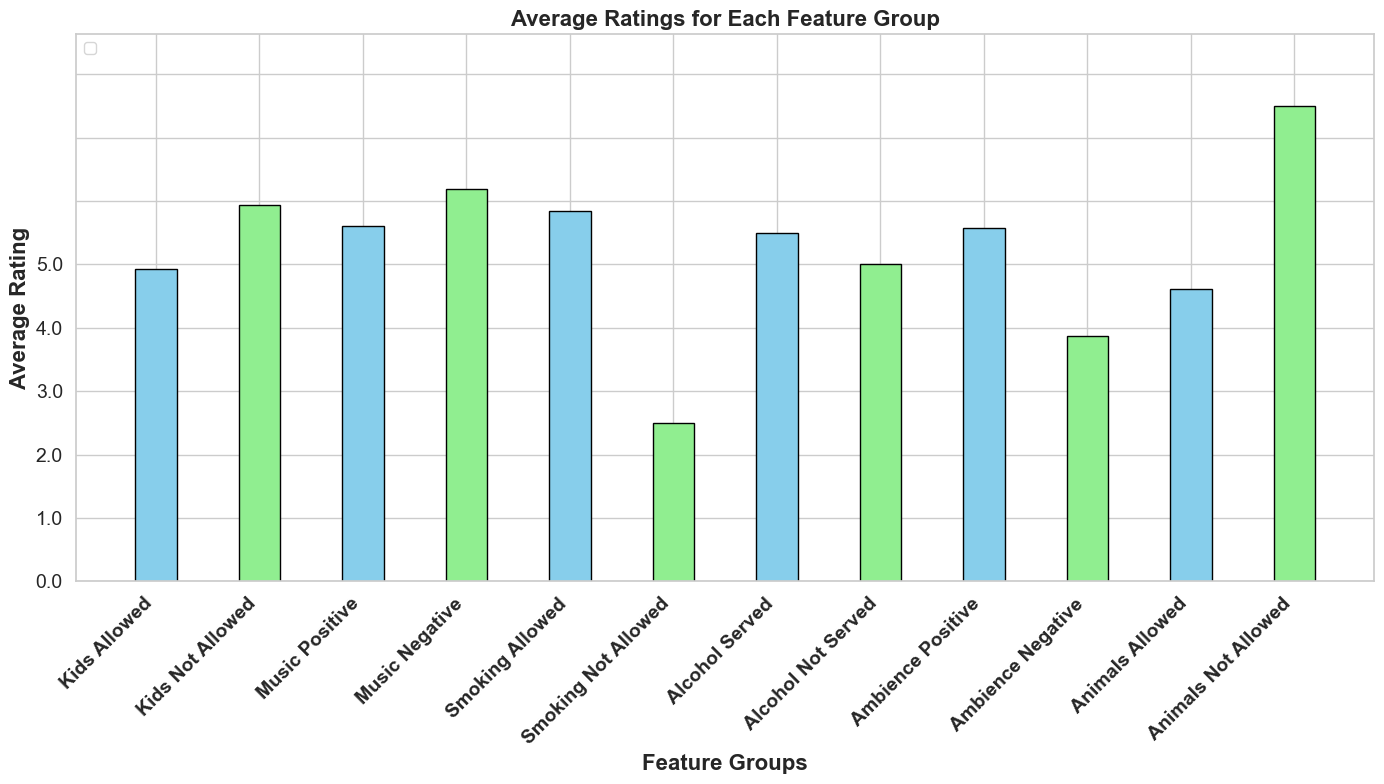

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming avg_ratings and keyword_groups are defined as per your previous messages

# Calculate the positions for each group's bar on the x-axis
x = np.arange(len(keyword_groups))  # the label locations for all groups
width = 0.4  # the width of the bars, increased to fill the gap

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each group, with adjacent bars touching each other
for i, (group_name, avg_rating) in enumerate(zip(keyword_groups.keys(), avg_ratings)):
    # Select color based on the group
    color = 'lightgreen' if 'not' in group_name or 'negative' in group_name else 'skyblue'
    ax.bar(x[i], avg_rating, width, color=color, edgecolor='black')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Groups', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Rating', fontsize=16, fontweight='bold')
ax.set_title('Average Ratings for Each Feature Group', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([group.replace('_', ' ').title() for group in keyword_groups.keys()], rotation=45, ha='right', fontsize=14, fontweight='bold')

# Set the y-axis to start at 3
ax.set_ylim(bottom=3)

# Define the legend
green_patch = plt.Rectangle((0,0),1,1,fc='lightgreen', edgecolor = 'none')
blue_patch = plt.Rectangle((0,0),1,1,fc='skyblue',  edgecolor = 'none')
ax.legend([blue_patch, green_patch], ['Positive', 'Negative'], fontsize=14)


# Create legend & Show graphic
ax.legend(loc='upper left')
# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


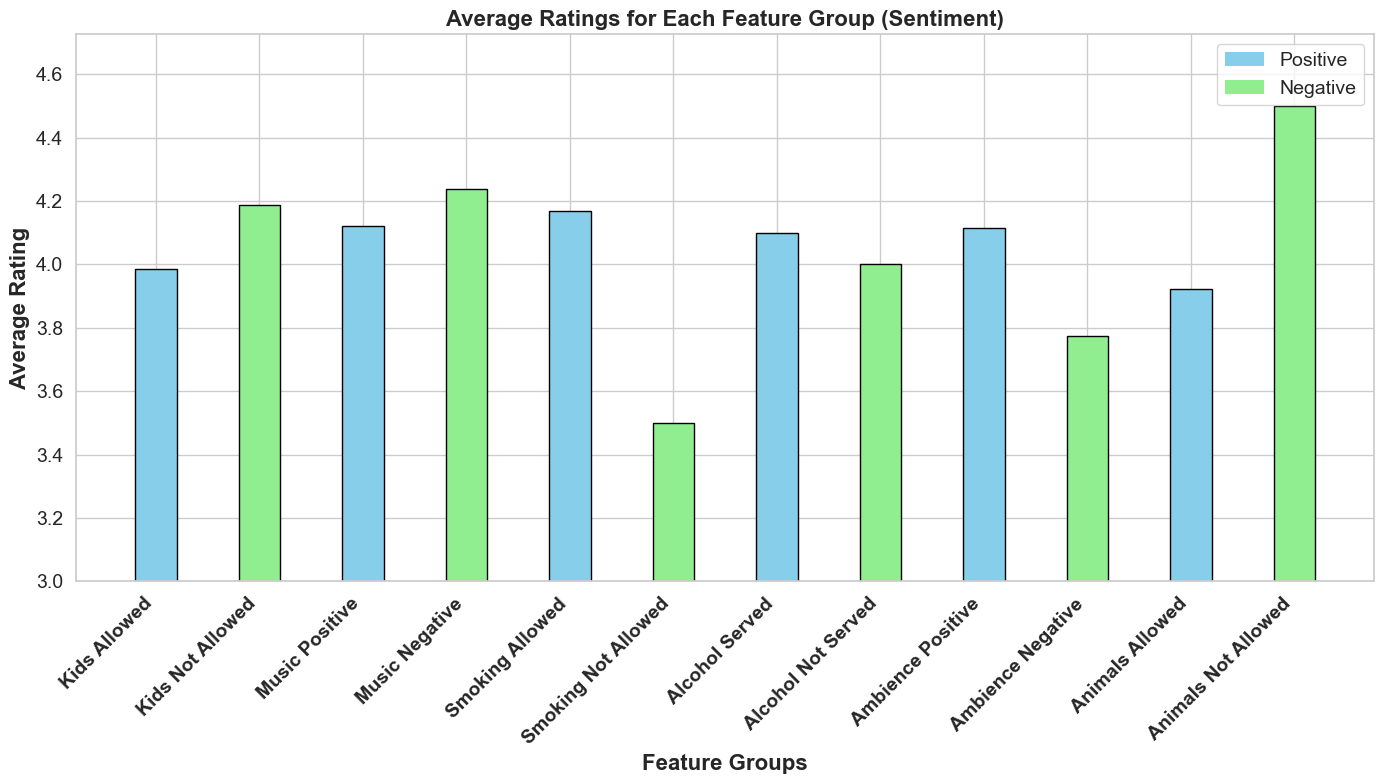

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming avg_ratings and keyword_groups are defined as per your previous messages

# Calculate the positions for each group's bar on the x-axis
x = np.arange(len(keyword_groups))  # the label locations for all groups
width = 0.4  # the width of the bars, increased to fill the gap

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each group, with adjacent bars touching each other
for i, (group_name, avg_rating) in enumerate(zip(keyword_groups.keys(), avg_ratings)):
    # Select color based on the group
    color = 'lightgreen' if 'not' in group_name or 'negative' in group_name else 'skyblue'
    ax.bar(x[i], avg_rating, width, color=color, edgecolor='black')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Groups', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Rating', fontsize=16, fontweight='bold')
ax.set_title('Average Ratings for Each Feature Group (Sentiment)', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([group.replace('_', ' ').title() for group in keyword_groups.keys()], rotation=45, ha='right', fontsize=14, fontweight='bold')

# Set the y-axis to start at 3 and increase the tick label size with bold font
ax.set_ylim(bottom=3)
ax.tick_params(axis='y', labelsize=14)

# Define the legend
green_patch = plt.Rectangle((0,0),1,1,fc='lightgreen', edgecolor = 'none')
blue_patch = plt.Rectangle((0,0),1,1,fc='skyblue',  edgecolor = 'none')
ax.legend([blue_patch, green_patch], ['Positive', 'Negative'], fontsize=14)


# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


In [131]:
import pandas as pd

# Assuming 'keyword_groups' is a dictionary with your feature groups and 'avg_ratings' is a list with your average ratings

# Create lists for positive and negative sentiment groups and their ratings
positive_groups = [group for group in keyword_groups if 'not' not in group and 'negative' not in group]
negative_groups = [group for group in keyword_groups if 'not' in group or 'negative' in group]

positive_ratings = [avg_ratings[i] for i in range(len(avg_ratings)) if 'not' not in positive_groups[i] and 'negative' not in positive_groups[i]]
negative_ratings = [avg_ratings[i] for i in range(len(avg_ratings)) if 'not' in negative_groups[i] or 'negative' in negative_groups[i]]

# Create a DataFrame
data = {
    'Feature Group': positive_groups + negative_groups,
    'Average Rating': positive_ratings + negative_ratings,
    'Sentiment': ['Positive'] * len(positive_groups) + ['Negative'] * len(negative_groups)
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


IndexError: list index out of range

In [132]:
import pandas as pd

# Assuming 'keyword_groups' is a dictionary with your feature groups
# and 'avg_ratings' is a list with your average ratings

# Create a DataFrame directly from the keyword_groups and avg_ratings
data = {
    'Feature Group': list(keyword_groups.keys()),
    'Average Rating': avg_ratings
}

df = pd.DataFrame(data)

# Now, if you want to 

add a 'Sentiment' column based on the group name containing 'not' or 'negative'
df['Sentiment'] = df['Feature Group'].apply(lambda x: 'Negative' if 'not' in x or 'negative' in x else 'Positive')

# Display the DataFrame
print(df)


          Feature Group  Average Rating Sentiment
0          kids_allowed        3.986111  Positive
1      kids_not_allowed        4.187500  Negative
2        music_positive        4.119469  Positive
3        music_negative        4.236842  Negative
4       smoking_allowed        4.166667  Positive
5   smoking_not_allowed        3.500000  Negative
6        alcohol_served        4.099066  Positive
7    alcohol_not_served        4.000000  Negative
8     ambience_positive        4.114275  Positive
9     ambience_negative        3.773148  Negative
10      animals_allowed        3.923077  Positive
11  animals_not_allowed        4.500000  Negative


In [135]:
import pandas as pd
keyword_groups = {
    "kids_allowed": [
        "kids welcome", "child-friendly", "good for kids", "children allowed", "suitable for children", 
        "family-friendly", "welcomes children", "kid-approved", "children-friendly environment", "safe for kids",'kids allowed','allowed kids','children allowed','kids ordered'
    ],
    "kids_not_allowed": [
        "no kids", "not good for kids", "children not allowed", "kids not welcome", "adults only", 
        "not child-friendly", "no children", "not suitable for children", "kid-free zone", "children restricted"
    ],
    "music_positive": [
        "great music", "live music", "dance floor", "good music", "music was good", "excellent playlist", 
        "fantastic music", "enjoyable music", "live band", "good tunes"
    ],
    "music_negative": [
        "noisy music", "loud music", "music too loud", "overpowering music", "annoying music", 
        "distracting music", "unpleasant music", "too loud sound", "disruptive music", "aggressive music"
    ],
    "smoking_allowed": [
        "smoking area", "smoker friendly", "vape allowed", "can smoke", "smoking zone", 
        "smoking permitted", "smoker's corner", "designated smoking area", "smoking lounge", "smoking section"
    ],
    "smoking_not_allowed": [
        "no smoking", "smoke-free", "non-smoking", "smoking prohibited", "no smoking allowed", 
        "smoking not permitted", "smoke-free environment", "non-smoking area", "clean air", "no tobacco"
    ],
    "alcohol_served": [
        "alcohol", "full bar", "happy hour", "cocktails", "beer", "wine", "spirits", "liquor served", 
        "drinks available", "bar service"
    ],
    "alcohol_not_served": [
        "no alcohol", "alcohol-free", "dry establishment", "non-alcoholic", "no liquor", 
        "booze-free", "no beer", "no wine", "alcohol restricted", "zero alcohol"
    ],
    "ambience_positive": [
        "cozy", "great ambience", "nice vibe", "friendly staff", "welcoming atmosphere", 
        "pleasant setting", "relaxing environment", "charming decor", "inviting space", "warm atmosphere"
    ],
    "ambience_negative": [
        "poor service", "rude staff", "too crowded", "noisy", "unpleasant atmosphere", 
        "cramped space", "unfriendly vibe", "bad lighting", "overcrowded", "uncomfortable seating"
    ],
   
    "animals_allowed": [
        "pets allowed", "dog-friendly", "animal friendly", "pet-friendly", "welcome pets",
        "allows animals", "pets welcome", "dog allowed", "cat friendly", "service animals accepted"
    ],
    "animals_not_allowed": [
        "no pets", "pets not allowed", "no dogs", "no animals", "non-pet-friendly",
        "no pets allowed", "animals not welcome", "no pet policy", "service animals only", "pet restrictions"
    ]
}

# Assuming you have already calculated sentiment scores and stored them in merged_data

# Create a list to store the correlations
correlations = []

for group in keyword_groups:
    # Calculate the correlation coefficient between the group's sentiment and average ratings
    correlation = merged_data[group + '_sentiment'].corr(merged_data['stars_x'])
    correlations.append({'Group': group, 'Correlation': correlation})

# Convert the list of dictionaries into a DataFrame
correlations_df = pd.DataFrame(correlations)

# Print the correlation coefficients for each group
print(correlations_df)


                  Group  Correlation
0          kids_allowed     0.061558
1      kids_not_allowed     0.333459
2        music_positive    -0.048077
3        music_negative    -0.072765
4       smoking_allowed     0.254344
5   smoking_not_allowed     0.386123
6        alcohol_served     0.039174
7    alcohol_not_served     0.083632
8     ambience_positive    -0.001555
9     ambience_negative     0.359445
10      animals_allowed    -0.593611
11  animals_not_allowed          NaN


/Users/Patron/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/Patron/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


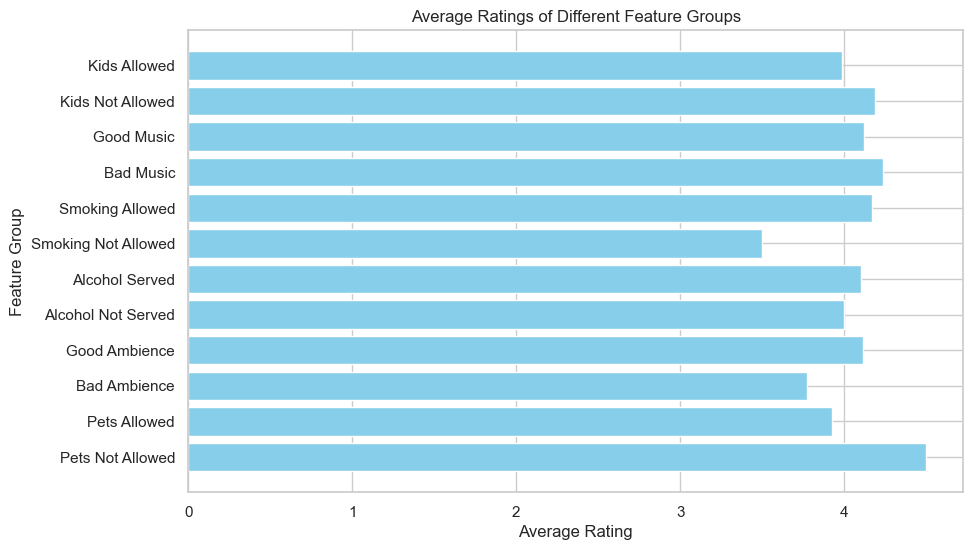

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating the DataFrame from the provided data
data = {
    "Feature Group": [
        "Kids Allowed", "Kids Not Allowed", "Good Music", "Bad Music",
        "Smoking Allowed", "Smoking Not Allowed", "Alcohol Served",
        "Alcohol Not Served", "Good Ambience", "Bad Ambience",
        "Pets Allowed", "Pets Not Allowed"
    ],
    "Average Rating": [
        3.986111, 4.187500, 4.119469, 4.236842, 4.166667, 3.500000,
        4.099066, 4.000000, 4.114275, 3.773148, 3.923077, 4.500000
    ]
}

df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df["Feature Group"], df["Average Rating"], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Feature Group')
plt.title('Average Ratings of Different Feature Groups')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.show()


In [80]:
import matplotlib.pyplot as plt

# Select the groups for which you want to visualize average ratings
selected_groups = ['animals', 'reservations', 'ambience']

# Filter the merged_data DataFrame to include only the selected groups
filtered_data = merged_data[merged_data['Group'].str.contains('|'.join(selected_groups))]

# Create a bar plot to visualize the average ratings for each group
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['Group'], filtered_data['stars_x'], color='skyblue')
plt.xlabel('Groups')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Selected Groups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


KeyError: 'Group'

In [87]:
import pandas as pd
brunch_data=merged_data
# Assuming you have loaded your data into a DataFrame named 'brunch_data'
# brunch_data = pd.read_csv('your_file.csv')  # Uncomment and replace with your file path

# Calculate the mean and standard deviation for review counts
mean_review_count = brunch_data['review_count'].mean()
std_review_count = brunch_data['review_count'].std()

# Calculate the threshold for mean + 2 standard deviations
threshold = mean_review_count + 2 * std_review_count

# Calculate the 95th percentile
percentile_95th = brunch_data['review_count'].quantile(0.25)

print("Mean Review Count:", mean_review_count)
print("Standard Deviation of Review Count:", std_review_count)
print("Threshold (Mean + 2 Std Dev):", threshold)
print("95th Percentile:", percentile_95th)


Mean Review Count: 419.1356769320163
Standard Deviation of Review Count: 405.72933166844314
Threshold (Mean + 2 Std Dev): 1230.5943402689027
95th Percentile: 124.0
